<a href="https://colab.research.google.com/github/cliu001/machine-learning/blob/main/week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


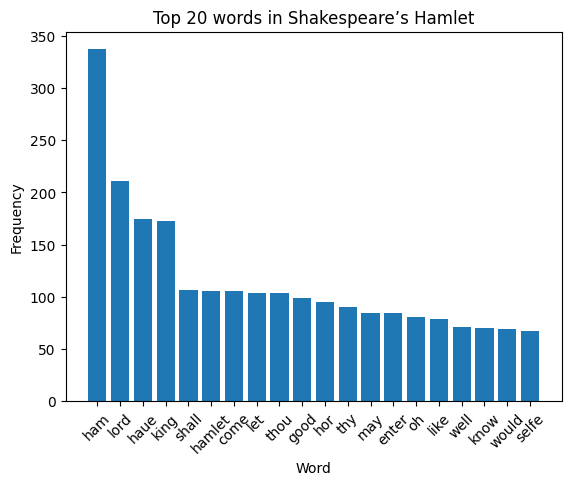

<ipython-input-1-008bd29937f3>:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


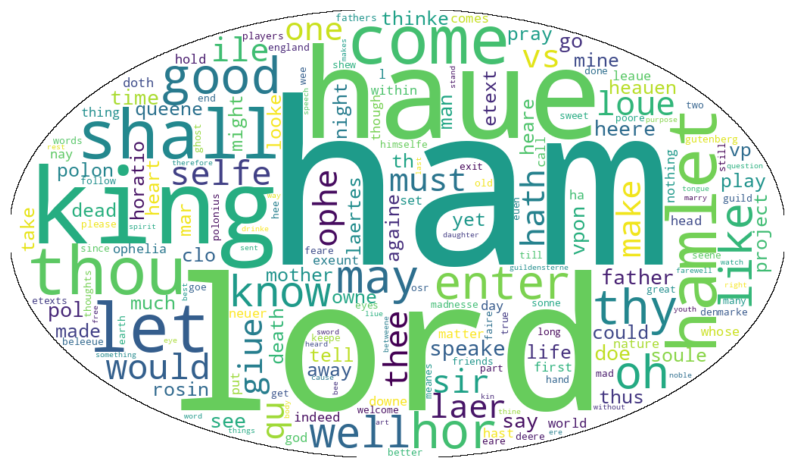

In [1]:
# Importing necessary libraries (unchanged)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import imageio
import matplotlib.pyplot as plt
from wordcloud import WordCloud
!pip install requests

# Keeping the specified parts unchanged
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Retrieving data from the provided URL
import requests
target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

# Using TextBlob
blob = TextBlob(data)

# Preprocessing
words = word_tokenize(blob.string)
clean_words = [word.lower() for word in words if word.isalpha()]  # Only words, no numbers/punctuation
filtered_words = [word for word in clean_words if word not in stopwords.words('english')]

# Getting frequency distribution of the words
freq = nltk.FreqDist(filtered_words)

# Creating a top-20 word frequency bar chart
top_words = freq.most_common(20)
words, frequencies = zip(*top_words)
plt.bar(words, frequencies)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 words in Shakespeare’s Hamlet')
plt.xticks(rotation=45)
plt.show()
# Creating a word cloud
image_file = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)
wordcloud = WordCloud(background_color='white', mask=mask_image, contour_width=1, contour_color='black').generate_from_frequencies(freq)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


